In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

In [2]:
import faraway.datasets.mba
mba = faraway.datasets.mba.load()
mba.head()

,happy,money,sex,love,work
0,10,36,0,3,4
1,8,47,1,3,1
2,8,53,0,3,5
3,8,35,1,3,3
4,4,88,1,1,2


In [ ]:
print(faraway.datasets.mba.DESCR)

In [4]:
import faraway.utils

lmod = smf.ols(
    "happy ~ money + sex+ love + work",
    data=mba
).fit()
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept -0.072  0.853   -0.08  0.9331
money      0.010  0.005    1.84  0.0749
sex       -0.149  0.419   -0.36  0.7240
love       1.919  0.295    6.50  0.0000
work       0.476  0.199    2.39  0.0227

n=39 p=5 Residual SD=1.058 R-squared=0.71


In [5]:
%run utils.ipynb

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

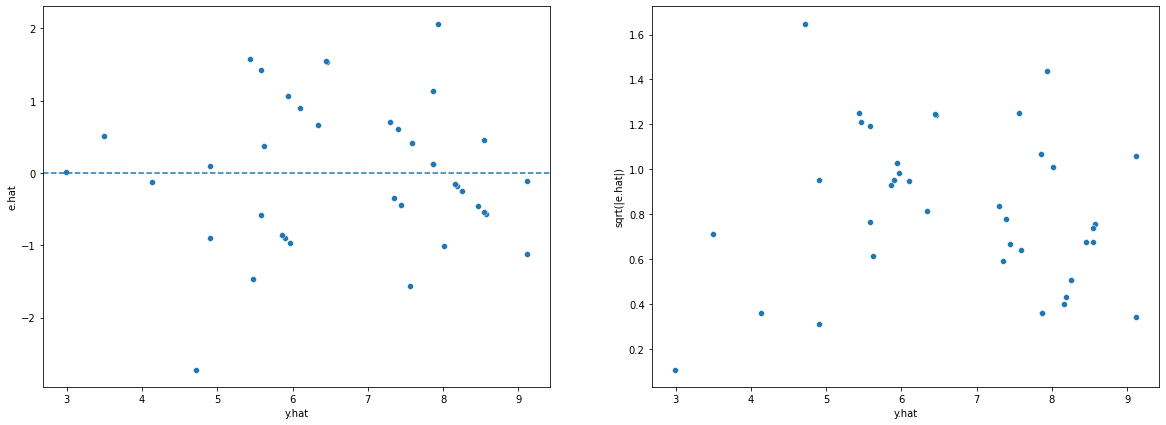

In [6]:
resid_yhat_plot(lmod)

In [7]:
diagv = lmod.get_influence()
lev = pd.Series(diagv.hat_matrix_diag)
n = mba.shape[0]
p = n - lmod.df_resid
threshold = 2*p/n
high_lev=lev[lev > threshold]
high_lev

1    0.270260
5    0.304434
6    0.304434
9    0.294036
dtype: float64

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

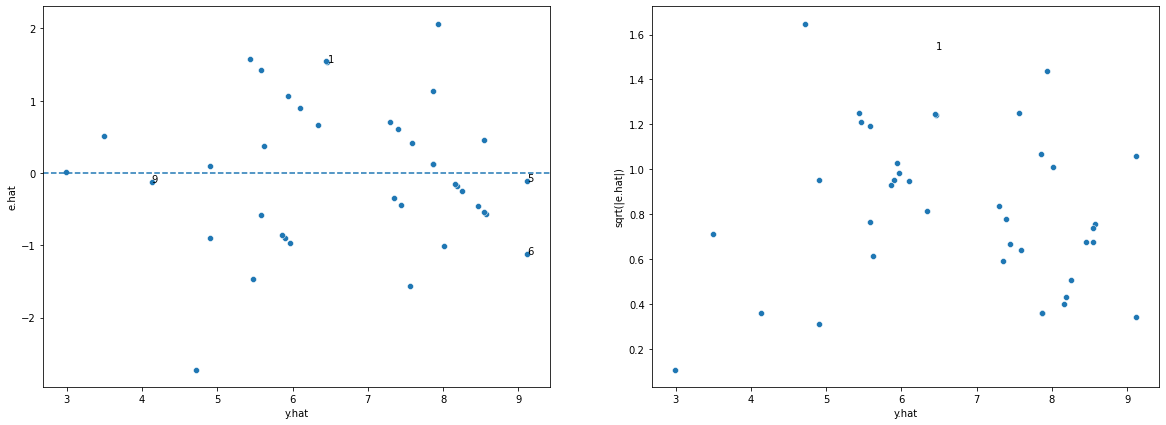

In [8]:
resid_yhat_plot(lmod, to_annotate=high_lev.index)

Why are the diagonal lines? </br>
$I \subset \mathbb{N}\{1,\ldots,p\}$ </br>
$\forall i \in I$ (they are on the diagonal) $\iff \forall i \in I (y_i = k_i\sum_j \hat{\beta}_jx_j + b_i) $

In [9]:
lmod_cut = smf.ols(
    "happy ~ sex+ love + work",
    data=mba
).fit()
lmod_cut.sumary()

          coefs stderr tvalues pvalues
Intercept 0.104  0.875    0.12  0.9063
sex       0.108  0.408    0.26  0.7933
love      1.944  0.305    6.37  0.0000
work      0.530  0.204    2.60  0.0135

n=39 p=4 Residual SD=1.094 R-squared=0.68


(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

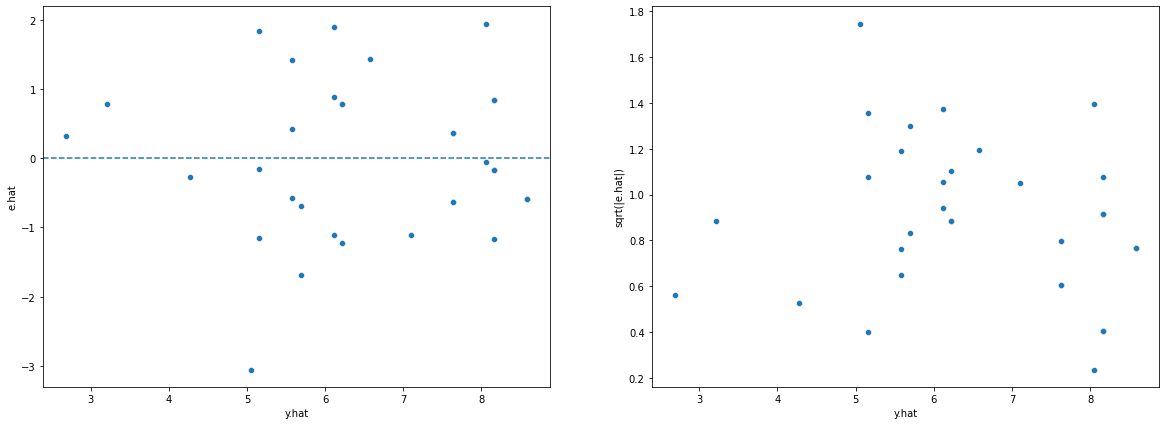

In [10]:
resid_yhat_plot(lmod_cut)

    happy  money  sex  love  work
5       9    175    1     3     4
6       8    175    1     3     4
9       4     55    1     1     4
11      8     45    1     3     4
13      8     45    1     3     4
16      8     85    1     3     4
19      5     40    1     2     4
21      9     44    1     3     4
24      9    115    1     3     4
25      7     44    1     2     4
32      7     85    1     2     4
33      8     75    1     3     4
37      7     60    1     3     4


(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

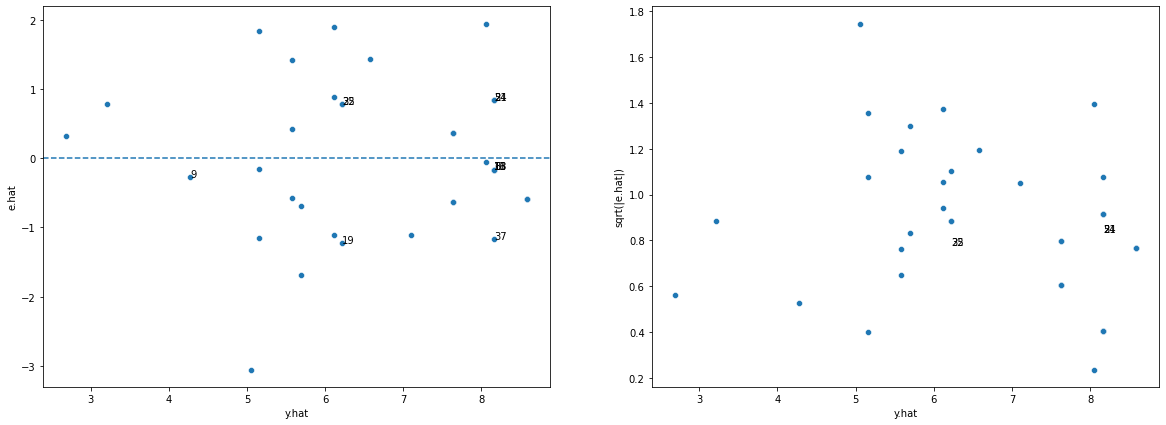

In [11]:
ind = mba[(mba["sex"] == 1) & (mba["work"] == 4)].index
print(mba[(mba["sex"] == 1) & (mba["work"] == 4)])
resid_yhat_plot(lmod_cut, to_annotate=ind)

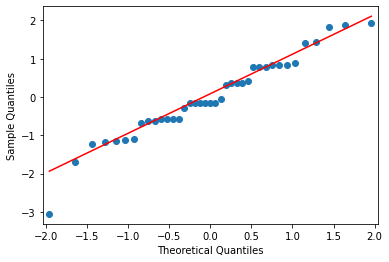

In [12]:
_ = sm.qqplot(lmod_cut.resid, line="q")

This happens because there several identical records in the dataset.

In [13]:
duplicates_ids = mba.duplicated(keep=False)[mba.duplicated(keep=False) == True].index
mba.iloc[duplicates_ids, :]

,happy,money,sex,love,work
11,8,45,1,3,4
13,8,45,1,3,4


This signifies that normality assumption on error is inadequte for the data. </br>
The problem here really is that the response is a categorical variables, whereas of course our assumptions dictate it to be numerical

<AxesSubplot:xlabel='sex'>

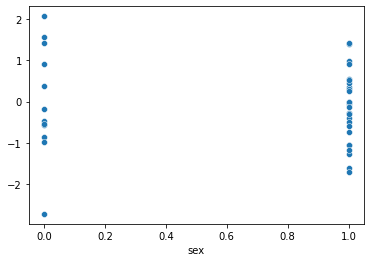

In [14]:
part_res = lmod.resid + lmod.params["sex"]*mba["sex"] 
sns.scatterplot(
    x=mba["sex"],
    y=part_res
)

In [15]:
part_res_sex = lmod.resid[mba["sex"] == 1] + \
    lmod.params["sex"]*mba["sex"][mba["sex"] == 1]
part_res_sex.mean()

-0.1490077523740005